# Quantium Virtual Internship

## Data preparation and customer analytics

### Here is the background information on your task
You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.
The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

You have received the following email from your manager, Zilinka.

'Hi, 

Welcome again to the team, we love having new graduates join us! 

I just wanted to send a quick follow up from our conversation earlier with a few pointers around the key areas of this task to make sure we set you up for success. 

Below I have outlined your main tasks along with what we should be looking for in the data for each. 

  - **Examine transaction data** – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

  - **Examine customer data** – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

  - **Data analysis and customer segments** – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

  - **Deep dive into customer segments** – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 

  - **Make sure you save your analysis in the CSV files and your visualisations** – we will need them for our report. If you could work on this analysis and send me your initial findings by end of next week that would be great.  

Looking forward to reviewing your work. 

Thanks, 

Zilinka'
### Here is your task
We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

We have chosen to complete this task in R, however you will also find Python to be a useful tool in this piece of analytics. If you aren’t familiar with R or Python we would recommend searching a few online courses to help get you started. We have also provided an R solution template if you want some assistance in getting through this Task. Whilst its possible to complete the task in Excel you may find the size of the data and the nature of the tasks is such that it is more difficult to complete in Excel.  

To get started, download the resource csv data files below and begin performing high level data checks such as:

  - **Creating and interpreting high level summaries of the data**
  - **Finding outliers and removing these (if applicable)**
  - **Checking data formats and correcting (if applicable)**

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

As we are in the early stages of this analysis Zilinka has asked us to submit our initial findings, so please save your code as a .pdf file and upload it to unlock the model answer.

### Examine Data

In [2]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import datetime

In [3]:
# Read and get first 10 rows with head()
df_T = pd.read_csv('QVI_transaction_data.csv', sep=';')
df_T.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,"6,3"
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,"2,9"
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,"13,8"
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,"5,1"
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,"5,7"
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,"3,6"
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,"3,9"
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,"7,2"


In [4]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   DATE            264836 non-null  int64 
 1   STORE_NBR       264836 non-null  int64 
 2   LYLTY_CARD_NBR  264836 non-null  int64 
 3   TXN_ID          264836 non-null  int64 
 4   PROD_NBR        264836 non-null  int64 
 5   PROD_NAME       264836 non-null  object
 6   PROD_QTY        264836 non-null  int64 
 7   TOT_SALES       264836 non-null  object
dtypes: int64(6), object(2)
memory usage: 16.2+ MB


In [5]:
# Replace the commas in the price column with decimal points
df_T['TOT_SALES'] = df_T['TOT_SALES'].str.replace(',', '.')

# Convert the price column to a float data type
df_T['TOT_SALES'] = df_T['TOT_SALES'].astype('float')

In [6]:
# Updated Dtpye for TOT_SALES
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
# Convert DATE coloumn to datetime datatype
df_T['DATE'] = df_T['DATE'].astype('datetime64[D]')

In [8]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype        
---  ------          --------------   -----        
 0   DATE            264836 non-null  datetime64[s]
 1   STORE_NBR       264836 non-null  int64        
 2   LYLTY_CARD_NBR  264836 non-null  int64        
 3   TXN_ID          264836 non-null  int64        
 4   PROD_NBR        264836 non-null  int64        
 5   PROD_NAME       264836 non-null  object       
 6   PROD_QTY        264836 non-null  int64        
 7   TOT_SALES       264836 non-null  float64      
dtypes: datetime64[s](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [9]:
# Create a datetime object from the numbers 43390
date = datetime.date.fromordinal(43390)

# Convert the datetime object to a string in the format YYYY-MM-DD
date_str = date.strftime('%Y-%m-%d')

In [10]:
df_T.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2088-10-18,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2089-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2089-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2088-08-18,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2088-08-19,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


**We are going to remove the 'DATE' column as it returns dates in the far future such as "2088"**

In [11]:
# Drop the date column
df_T = df_T.drop('DATE', axis=1)

In [12]:
df_T.head(10)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [13]:
df_T.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [14]:
df_T.shape

(264836, 7)

In [15]:
# Check for missing data
missing_data = df_T.isnull().sum()
print(missing_data)

STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


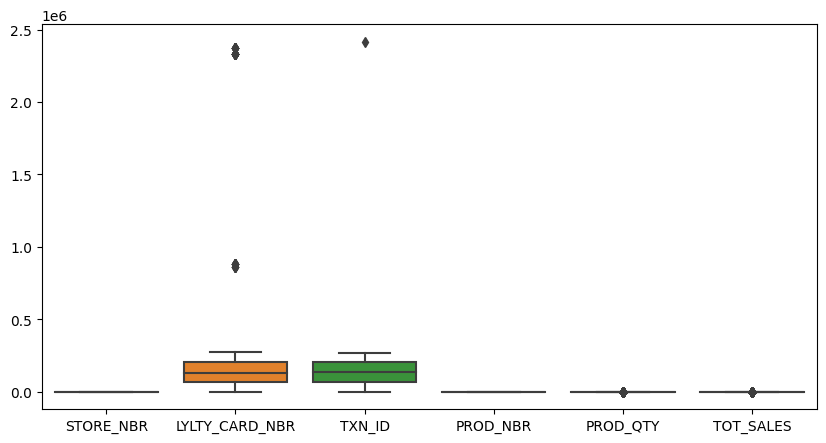

In [16]:
# Create a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_T)
plt.show()

In [17]:
# Define the column you want to remove outliers from
column = "LYLTY_CARD_NBR"

# Calculate the IQR
q25, q75 = np.percentile(df_T[column], [25, 75])
iqr = q75 - q25

# Identify the outliers
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
outliers = df_T[df_T[column] < lower_bound] | df_T[df_T[column] > upper_bound]

# Remove the outliers
df_T = df_T.drop(outliers.index)

In [18]:
# Define the column you want to remove outliers from
column = "TXN_ID"

# Calculate the IQR
q25, q75 = np.percentile(df_T[column], [25, 75])
iqr = q75 - q25

# Identify the outliers
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
outliers = df_T[df_T[column] < lower_bound] | df_T[df_T[column] > upper_bound]

# Remove the outliers
df_T = df_T.drop(outliers.index)

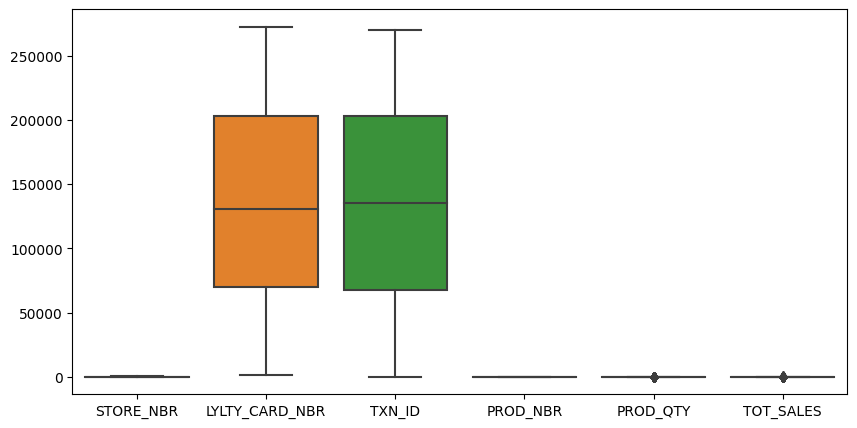

In [19]:
# Create a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_T)
plt.show()

In [20]:
df_T.duplicated().sum()

1

In [21]:
# Read the dataset and get first 10 rows with head()
df_B = pd.read_csv('QVI_purchase_behaviour.csv', sep=',')
df_B.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [22]:
df_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
df_B.shape

(72637, 3)

In [24]:
# Check for missing data
missing_data = df_B.isnull().sum()
print(missing_data)

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [25]:
df_B.duplicated().sum()

0

In [26]:
# merge the two datsasets
left = pd.DataFrame(df_T)

right = pd.DataFrame(df_B)

df_merged = pd.merge(left, right, on="LYLTY_CARD_NBR", how="inner")

df_merged.head(10)

# save the datset
df_merged.to_csv("Transaction_Behaviour_Dataset.csv")

In [27]:
df_merged.head(10)


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
5,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
6,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
7,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget
8,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget
9,4,4074,2979,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,MIDAGE SINGLES/COUPLES,Budget


## Data analysis and customer segments

In [28]:
# STORE_NBR Analysis
freq_table_SN = df_merged[['STORE_NBR']].value_counts().reset_index(name='count')
freq_table_SN

,STORE_NBR,count
0,226,2022
1,88,1861
2,93,1832
3,165,1819
4,237,1777
...,...,...
267,11,2
268,206,2
269,211,2
270,76,1


Text(0.5, 1.0, 'Store Count Plot')

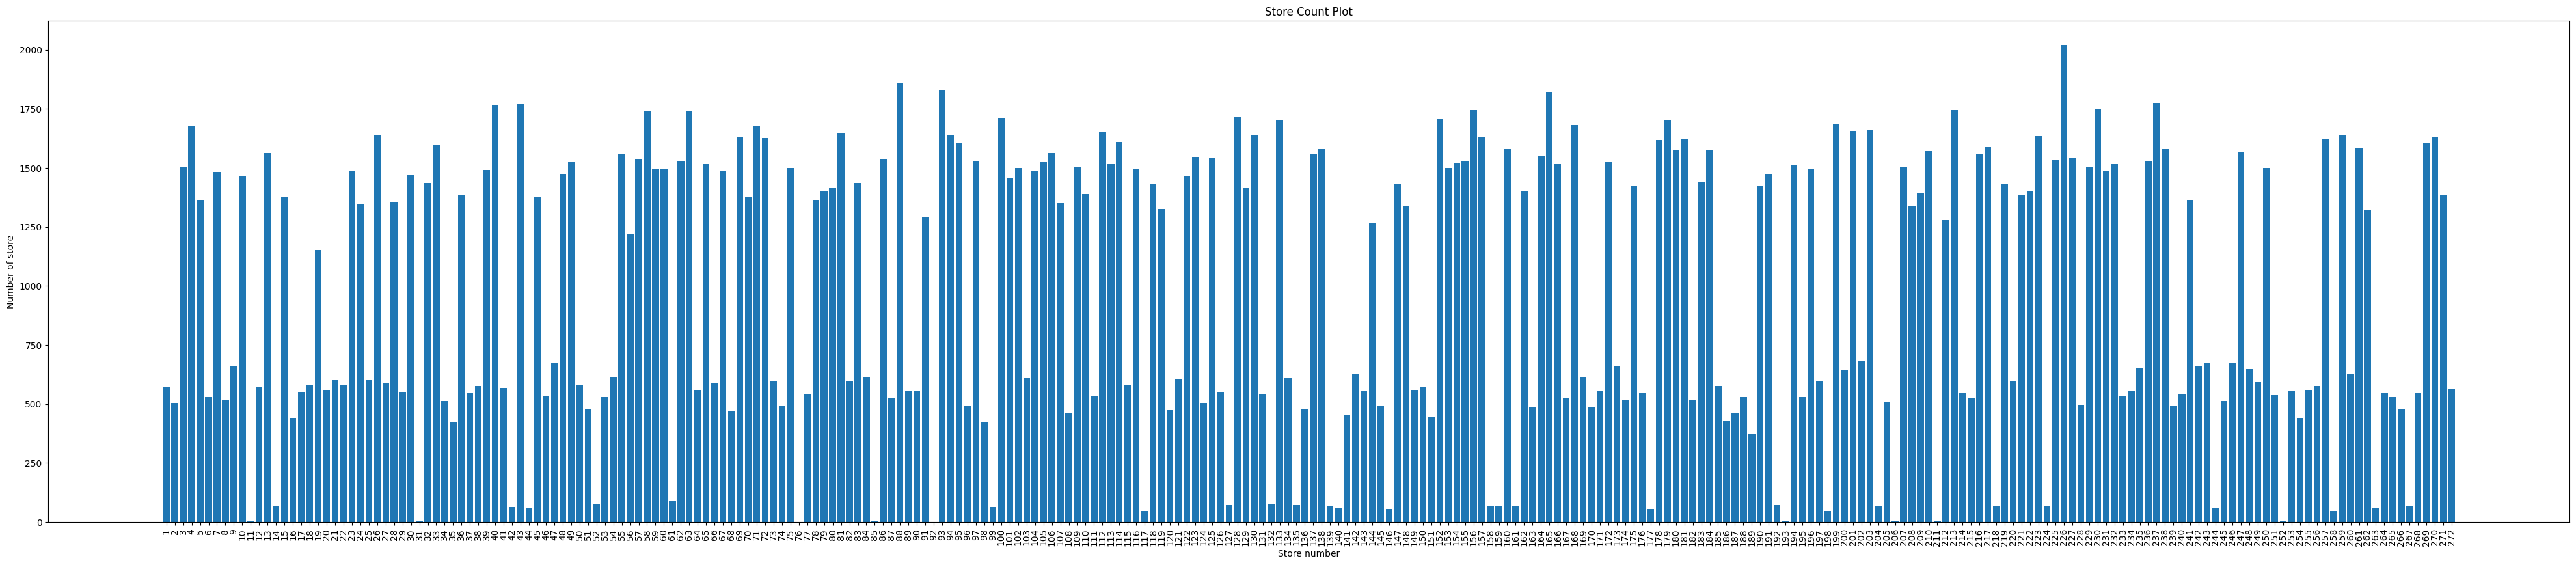

In [29]:
# Set figure size
plt.rcParams['figure.figsize'] = [50,10]
# Create Bar Chart
plt.bar(freq_table_SN['STORE_NBR'], freq_table_SN['count'])
# Y Label
plt.ylabel('Number of store')
# X Label
plt.xlabel('Store number')
plt.xticks(freq_table_SN['STORE_NBR'], rotation=90)
# Show plot
plt.title('Store Count Plot')

In [30]:
# Group the DataFrame by STORE_NBR
grouped_df = df_merged.groupby("STORE_NBR")

# Sum the TOT_SALES for each STORE_NBR
total_sales = grouped_df["TOT_SALES"].sum().reset_index(name="accumulated_total_sales")
total_sales = total_sales.sort_values("accumulated_total_sales", ascending=False)
print(total_sales)

     STORE_NBR  accumulated_total_sales
225        226                 18905.45
87          88                 16217.05
164        165                 15973.75
39          40                 15559.50
236        237                 15471.90
..         ...                      ...
205        206                     7.60
251        252                     7.40
10          11                     6.70
75          76                     6.00
210        211                     5.20

[272 rows x 2 columns]


In [31]:
# Get the top 20 stores
top_20_stores = total_sales.sort_values("accumulated_total_sales", ascending=False).head(20)

# Create a new DataFrame with only the top 20 stores
top_20_df = top_20_stores.copy()

# Save the new DataFrame as a separate file
top_20_df.to_csv("top_20_stores.csv")


In [32]:
top_20_stores = pd.read_csv("top_20_stores.csv")

In [33]:
top_20_stores.head(20)

,Unnamed: 0,STORE_NBR,accumulated_total_sales
0,225,226,18905.45
1,87,88,16217.05
2,164,165,15973.75
3,39,40,15559.50
4,236,237,15471.90
5,57,58,15251.45
6,198,199,14797.00
7,3,4,14647.65
8,202,203,14551.60
9,25,26,14469.30


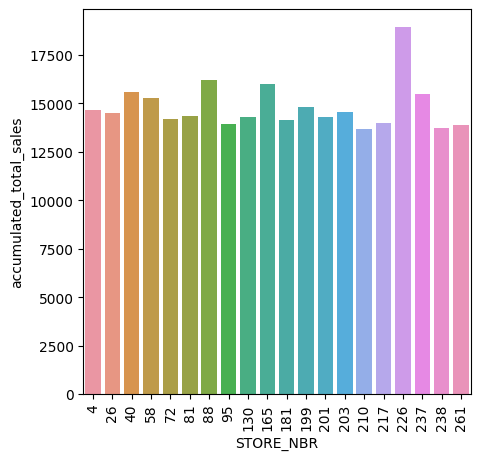

In [34]:
# set figure size
plt.figure(figsize=(5,5))
# Plot chart
sns.barplot(x = 'STORE_NBR', y = 'accumulated_total_sales', data = top_20_stores)
# Rotate the x-axis by 90 degrees
plt.xticks(rotation=90)
# Display
plt.show()

In [35]:
# Group the DataFrame by STORE_NBR
grouped_df = df_merged.groupby("PROD_NAME")

# Sum the TOT_SALES for each STORE_NBR
total_product_sales = grouped_df["TOT_SALES"].sum().reset_index(name="accumulated_total_sales")
total_product_sales = total_product_sales.sort_values("accumulated_total_sales", ascending=False)
print(total_product_sales)

                                    PROD_NAME  accumulated_total_sales
11           Dorito Corn Chp     Supreme 380g                  40326.0
86     Smiths Crnkle Chip  Orgnl Big Bag 380g                  36355.8
77   Smiths Crinkle Chips Salt & Vinegar 330g                  34781.4
33     Kettle Mozzarella   Basil & Pesto 175g                  34430.4
76          Smiths Crinkle      Original 330g                  34302.6
..                                        ...                      ...
104          WW Crinkle Cut      Chicken 175g                   4702.2
90   Sunbites Whlegrn    Crisps Frch/Onin 90g                   4596.8
105         WW Crinkle Cut      Original 175g                   4532.2
113            Woolworths Mild     Salsa 300g                   4234.5
112            Woolworths Medium   Salsa 300g                   4050.0

[114 rows x 2 columns]


In [36]:
# Get the top 20 stores
top_20_products = total_product_sales.sort_values("accumulated_total_sales", ascending=False).head(20)

# Create a new DataFrame with only the top 20 stores
top_20_products_df = top_20_products.copy()

# Save the new DataFrame as a separate file
top_20_products_df.to_csv("top_20_products.csv")

In [37]:
top_20_producst = pd.read_csv("top_20_products.csv")

In [38]:
top_20_products.head(20)

,PROD_NAME,accumulated_total_sales
11,Dorito Corn Chp Supreme 380g,40326.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36355.8
77,Smiths Crinkle Chips Salt & Vinegar 330g,34781.4
33,Kettle Mozzarella Basil & Pesto 175g,34430.4
76,Smiths Crinkle Original 330g,34302.6
6,Cheezels Cheese 330g,34296.9
12,Doritos Cheese Supreme 330g,33390.6
39,Kettle Sweet Chilli And Sour Cream 175g,33026.4
34,Kettle Original 175g,32740.2
35,Kettle Sea Salt And Vinegar 175g,32578.2


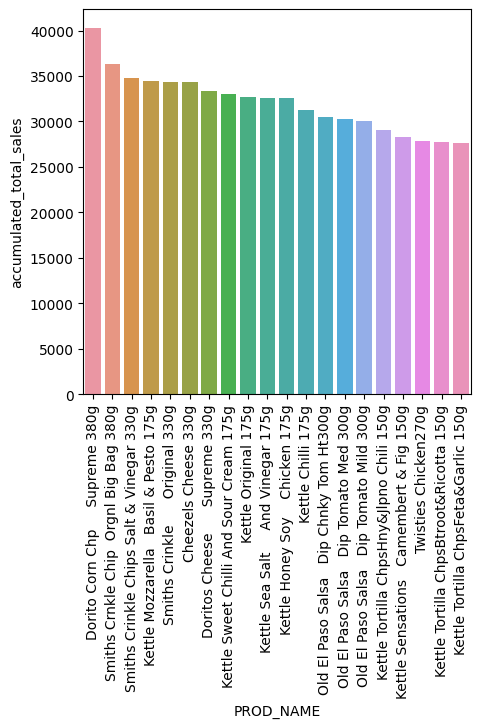

In [39]:
# set figure size
plt.figure(figsize=(5,5))
# Plot chart
sns.barplot(x = 'PROD_NAME', y = 'accumulated_total_sales', data = top_20_products)
# Rotate the x-axis by 90 degrees
plt.xticks(rotation=90)
# Display
plt.show()

In [40]:
# Group the DataFrame by STORE_NBR
grouped_df = df_merged.groupby("PROD_NAME")

# Sum the TOT_SALES for each STORE_NBR
total_products = grouped_df["PROD_QTY"].sum().reset_index(name="accumulated_total_products")
total_products = total_products.sort_values("accumulated_total_products", ascending=False)
print(total_products)

                                    PROD_NAME  accumulated_total_products
11           Dorito Corn Chp     Supreme 380g                        6505
33     Kettle Mozzarella   Basil & Pesto 175g                        6376
42   Kettle Tortilla ChpsHny&Jlpno Chili 150g                        6309
8              Cobs Popd Sea Salt  Chips 110g                        6277
10   Cobs Popd Swt/Chlli &Sr/Cream Chips 110g                        6254
..                                        ...                         ...
62                   RRD Pc Sea Salt     165g                        2700
112            Woolworths Medium   Salsa 300g                        2700
43     NCC Sour Cream &    Garden Chives 175g                        2682
105         WW Crinkle Cut      Original 175g                        2666
21             French Fries Potato Chips 175g                        2643

[114 rows x 2 columns]


In [41]:
# Get the top 20 stores
most_sold_products = total_products.sort_values("accumulated_total_products", ascending=False).head(20)

# Create a new DataFrame with only the top 20 stores
most_sold_products_df = most_sold_products.copy()

# Save the new DataFrame as a separate file
most_sold_products_df.to_csv("most_sold_products.csv")

In [42]:
most_sold_products = pd.read_csv("most_sold_products.csv")

In [43]:
most_sold_products.head(20)

,Unnamed: 0,PROD_NAME,accumulated_total_products
0,11,Dorito Corn Chp Supreme 380g,6505
1,33,Kettle Mozzarella Basil & Pesto 175g,6376
2,42,Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309
3,8,Cobs Popd Sea Salt Chips 110g,6277
4,10,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6254
5,98,Tostitos Splash Of Lime 175g,6234
6,102,Tyrrells Crisps Ched & Chives 165g,6227
7,30,Kettle 135g Swt Pot Sea Salt,6211
8,28,Infuzions Thai SweetChili PotatoMix 110g,6206
9,95,Thins Potato Chips Hot & Spicy 175g,6183


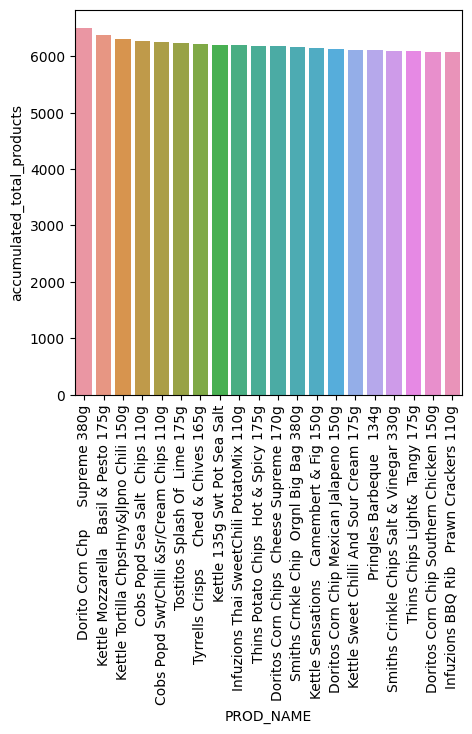

In [44]:
# set figure size
plt.figure(figsize=(5,5))
# Plot chart
sns.barplot(x = 'PROD_NAME', y = 'accumulated_total_products', data = most_sold_products)
# Rotate the x-axis by 90 degrees
plt.xticks(rotation=90)
# Display
plt.show()

In [45]:
# LIFESTAGE Analysis
freq_table_PC = df_merged[['PREMIUM_CUSTOMER']].value_counts().reset_index(name='count')
freq_table_PC

,PREMIUM_CUSTOMER,count
0,Mainstream,101971
1,Budget,93136
2,Premium,69684


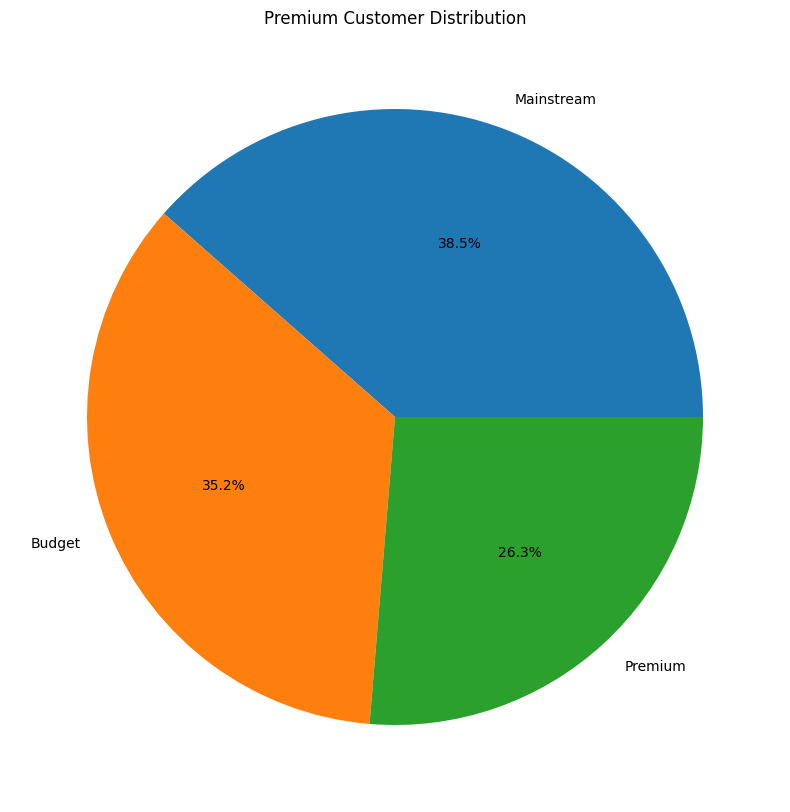

In [46]:
# Create a pie chart
plt.pie(freq_table_PC["count"], labels=freq_table_PC["PREMIUM_CUSTOMER"], autopct="%1.1f%%")

# Add a title
plt.title("Premium Customer Distribution")

# Show the chart
plt.show()

In [47]:
# LIFESTAGE Analysis
freq_table_LS = df_merged[['LIFESTAGE']].value_counts().reset_index(name='count')
freq_table_LS

,LIFESTAGE,count
0,OLDER SINGLES/COUPLES,54464
1,RETIREES,49756
2,OLDER FAMILIES,48589
3,YOUNG FAMILIES,43586
4,YOUNG SINGLES/COUPLES,36372
5,MIDAGE SINGLES/COUPLES,25105
6,NEW FAMILIES,6919


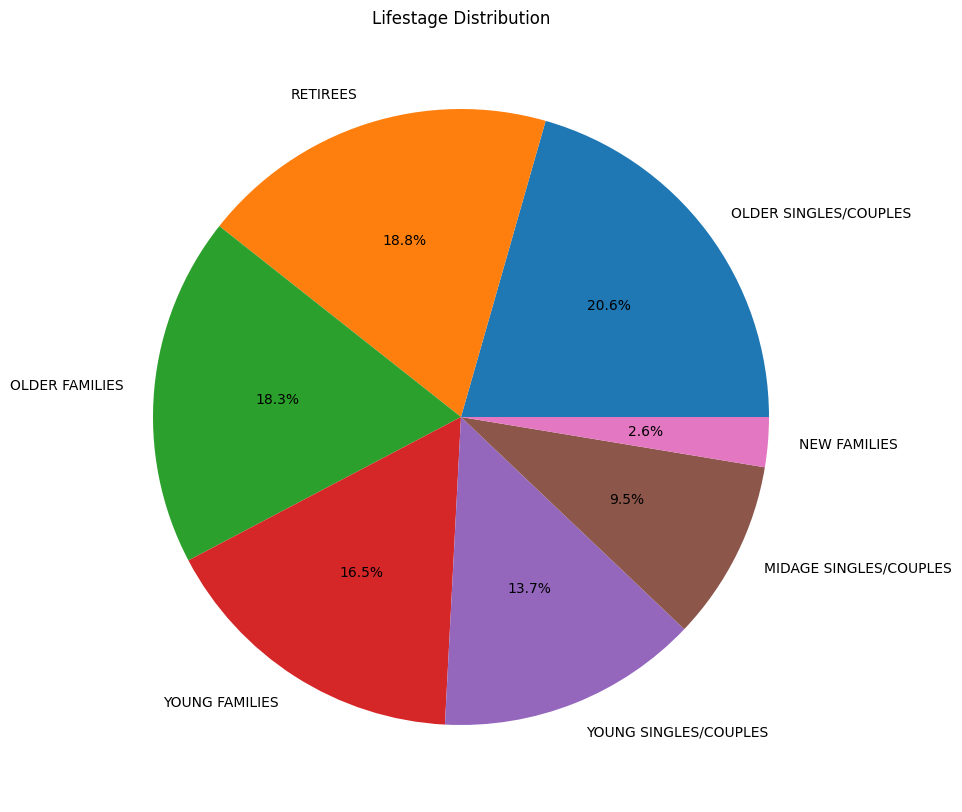

In [48]:
# Create a pie chart
plt.pie(freq_table_LS["count"], labels=freq_table_LS["LIFESTAGE"], autopct="%1.1f%%")

# Add a title
plt.title("Lifestage Distribution")

# Show the chart
plt.show()

## Deep dive into customer segments

### Recommendations and Insights

Top 5 Earning Stores:
1. Store number 226 - $18,905.45

2. Store number 88 - $16,217.05

3. Store number 165 - $15,973.75

4. Store number 40 - $15,559.50

5. Store number 237 - $15,471.90


Top 5 Selling Products:
1. Dorito Corn Chip Supreme 380g - $40 326,00

2. Smiths Crinkle Chil Original 380g - $36 355,80

3. Smiths Crinkle Chips Salt & Viniger 330g - $34 781,40

4. Kettle Mozzarella Basil & Pesto 175g - $34 430,40

5. Smiths Crinkle Original 330g - $34 302,60

Top 5 Most Sold Products:
1. Dorito Corn Chip Supreme 380g - 6505

2. Kettle Mozzarella Basil & Pesto 175g - 6376

3. Kettle Torilla Chips Honey & Jalapeño Chilli 150g - 6309

4. Cobs Popd Sea Salt Chips 110g - 6277

5. Cobs Popd Sweet Chilli & Sour Cream Chips 110g - 6254

Ranking Premium Customers:
1. Mainstream - 38,5%

2. Budget - 35,2%

3. Premium - 26,3%

Ranking Lifestages:
1. Older Single / Couples - 20,6%

2. Retirees - 18,8%

3. Older Families - 18,3%

**Based on the insights gathered:**

* Looking at our insights we can see that the favoured chips arent necessarily the productsa that bring in the most sales. Creating specials where they can bring in more sales of the chips that produce the higher levels of sales in. Market the pricing that the products that dont bring in the higher total sales seem more expensive than those that bring in more sales.
* Target clients that are older in age and are in the mainstream customer category as they are the ones that tend to buy more chips. Market it in a way that it is trendy to entice them to purchase more than they are right now.